In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

#getting available filenames
lms = ["xlmRBase", "xlmRLarge", "mBertUncased", "mBertCased", "nbBertBase", "nbBertLarge", "norbert", "norbert2"]
tags = ["i100_r0","i100_r1","i100_r2","i200_r0","i200_r1","i300_r0"]
allFiles = []

for lm in lms:
    for tag in tags:
        allFiles.append(f"{lm}_{tag}")

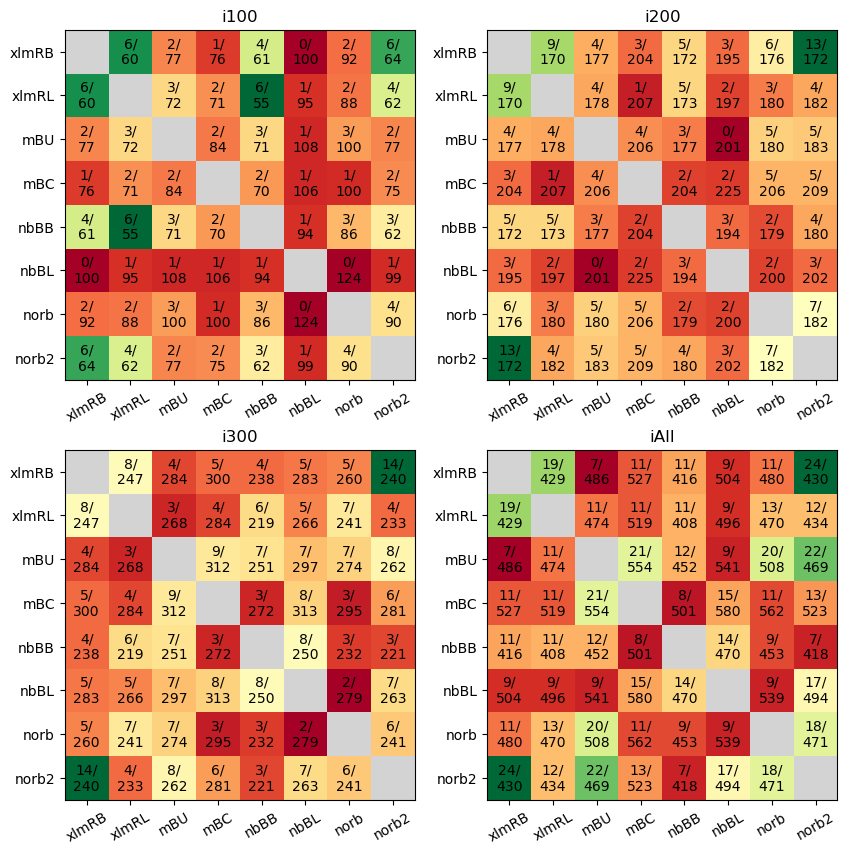

In [55]:
#####################################################################################################################
# heatmap

def formatData(file):
    with open(f"output_data/runsFilteredTotal/{file}.csv", mode = "r",encoding="UTF-8") as f:
        data = f.readlines()[1:]
        data = list(map(lambda x: x.split(";")[1].split(" ---> "),data)) # seperate ant and con
        data = list(map(lambda x: (set(x[0].split(" & ")), x[1]),data)) # seperate ant on &

    return data

def valuesForHeatmap(file1, file2):
    data1 = formatData(file1)
    data2 = formatData(file2)
    concat = data1 + data2
    mutual = list(filter(lambda x: x in data1, data2))
    symdiff = list(filter(lambda x: x not in mutual, concat))
    distinct = len(concat)-len(mutual)
    return (len(mutual), len(symdiff), distinct)

def createMatrix(itag):
    matrix = []
    matrixText = []
    for f1 in lms:
        vector = []
        vectorText = []
        for f2 in lms:
            mutual, symdiff, distinct = valuesForHeatmap(f"{f1 + itag}",f"{f2 + itag}") 
            percentage = round(mutual/distinct,3)
            # print(percentage)
            if percentage == 1.0:
                vector.append(np.nan)
                vectorText.append("")
            else: 
            # vector.append(valuesForHeatmap(f"{f1 + itag}",f"{f2 + itag}")[1])
                vector.append(round(mutual/distinct,3))
                vectorText.append(f"{mutual}/\n{distinct}")
        matrix.append(vector)
        matrixText.append(vectorText)
    return matrix, matrixText

i100, i100Text = createMatrix("_i100")
i200, i200Text = createMatrix("_i200")
i300, i300Text = createMatrix("_i300")
iAll, iAllText = createMatrix("_iAll")

lms_ = ["xlmRB", "xlmRL", "mBU", "mBC", "nbBB", "nbBL", "norb", "norb2"]
figure, axis = plt.subplots(2, 2, figsize=(10, 10))

def setHeatmap(matrix,text, title, position):
    x,y = position
    cmap = plt.cm.RdYlGn.copy()
    cmap.set_bad(color='#D3D3D3')
    axis[x, y].imshow(matrix, cmap=cmap, interpolation='nearest')
    n = len(matrix)
    for i in range(n):
        for j in range(n):
            axis[x, y].text(j, i, f"{text[i][j]}", ha="center", va="center", color="black")
    axis[x, y].set_xticks(ticks=np.arange(len(lms_)), labels=lms_, rotation=30)
    axis[x, y].set_yticks(ticks=np.arange(len(lms_)), labels=lms_)
    axis[x, y].set_title(title)

setHeatmap(i100, i100Text, "i100", [0,0])
setHeatmap(i200, i200Text, "i200", [0,1])
setHeatmap(i300, i300Text, "i300", [1,0])
setHeatmap(iAll, iAllText, "iAll", [1,1])
plt.show()

In [92]:
# analyzing from top rules
genders = ["kvinne", "mann"]
ages = ["yngre enn 20", "mellom 20 og 30", "mellom 30 og 40", "mellom 40 og 50", "mellom 50 og 60", "eldre enn 60"]
occupations = ["advokat","elektriker","rørlegger","modell","sykepleier","frisør","fotograf","forfatter"]
cities = ["Oslo", "Kristiansand", "Stavanger", "Bergen", "Ålesund", "Trondheim", "Bodø", "Tromsø"]
ethnicities = ["Asia", "Afrika", "Nord Amerika", "Sør Amerika", "Europa", "Australia"]

def converter(token):
    if token in genders:    return 0
    if token in ages:       return 1
    if token in occupations:return 2
    if token in cities:     return 3
    if token in ethnicities:return 4

rules = []
with open(f"output_data/runsFilteredTotal/combineFromTopTen.csv", mode = "r",encoding="UTF-8") as f:
    data = f.readlines()[1:]
    data = list(map(lambda x: x.split(";"),data))
    data = list(map(lambda x: [x[0], x[1].split(" ---> ")[0].split(" & "), x[1].split(" ---> ")[1]],data))
    data = list(map(lambda x: [x[0], sorted(x[1], key = converter),x[2]],data))
    data = list(map(lambda x: f"{x[0]} ; {' & '.join(x[1])} ---> {x[2]}", data))

    data = list(map(lambda x: x.replace("&", "\&"), data))
    data = list(map(lambda x: x.replace(";", "&"), data))
    # print(data[1])
    rules = [f" {x[:-1]} \\\\ \hline" for x in data]
# print(rules)

<>:23: SyntaxWarning: invalid escape sequence '\&'
<>:26: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\&'
<>:26: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Johnn\AppData\Local\Temp\ipykernel_9572\4118462882.py:23: SyntaxWarning: invalid escape sequence '\&'
  data = list(map(lambda x: x.replace("&", "\&"), data))
C:\Users\Johnn\AppData\Local\Temp\ipykernel_9572\4118462882.py:26: SyntaxWarning: invalid escape sequence '\h'
  rules = [f" {x[:-1]} \\\\ \hline" for x in data]


In [94]:
# all rules
for text in rules:
    # text = f" {data[i][:-1]} \\\\ \hline"
    print(text)

 57/72 & kvinne \& elektriker ---> FALSE \\ \hline
 43/72 & kvinne \& rørlegger ---> FALSE \\ \hline
 31/72 & kvinne \& advokat ---> FALSE \\ \hline
 27/72 & kvinne \& fotograf ---> FALSE \\ \hline
 27/72 & mann \& modell ---> FALSE \\ \hline
 25/72 & mann \& sykepleier ---> FALSE \\ \hline
 16/72 & kvinne \& forfatter ---> FALSE \\ \hline
 10/72 & mann \& frisør \& Australia ---> FALSE \\ \hline
 9/72 & kvinne \& sykepleier ---> FALSE \\ \hline
 9/72 & mann \& frisør \& Europa ---> FALSE \\ \hline
 9/72 & mann \& frisør ---> FALSE \\ \hline
 8/72 & kvinne \& frisør ---> FALSE \\ \hline
 7/72 & mann \& forfatter ---> FALSE \\ \hline
 6/72 & kvinne \& modell ---> FALSE \\ \hline
 5/72 & kvinne \& mellom 30 og 40 \& advokat ---> FALSE \\ \hline
 5/72 & kvinne \& eldre enn 60 \& fotograf ---> FALSE \\ \hline
 5/72 & kvinne \& mellom 20 og 30 \& fotograf ---> FALSE \\ \hline
 5/72 & kvinne \& mellom 20 og 30 \& advokat ---> FALSE \\ \hline
 4/72 & mann \& frisør \& Asia ---> FALSE \\ \hlin

In [95]:
# female and female occupation
for text in rules:
    if ("kvinne" in text) and (("modell" in text) or ("sykepleier" in text) or ("frisør" in text)):
        print(text)


 9/72 & kvinne \& sykepleier ---> FALSE \\ \hline
 8/72 & kvinne \& frisør ---> FALSE \\ \hline
 6/72 & kvinne \& modell ---> FALSE \\ \hline
 3/72 & kvinne \& eldre enn 60 ---> sykepleier \\ \hline
 3/72 & kvinne \& mellom 20 og 30 ---> modell \\ \hline
 3/72 & kvinne \& Ålesund ---> modell \\ \hline
 2/72 & kvinne \& yngre enn 20 ---> sykepleier \\ \hline
 2/72 & frisør ---> kvinne \\ \hline
 2/72 & kvinne \& Oslo ---> modell \\ \hline
 2/72 & kvinne \& Stavanger ---> modell \\ \hline
 2/72 & kvinne \& mellom 50 og 60 ---> modell \\ \hline
 2/72 & sykepleier \& Tromsø ---> kvinne \\ \hline


In [96]:
# female and male occupation
for text in rules:
    if ("kvinne" in text) and (("advokat" in text) or ("elektriker" in text) or ("rørlegger" in text)):
        print(text)

 57/72 & kvinne \& elektriker ---> FALSE \\ \hline
 43/72 & kvinne \& rørlegger ---> FALSE \\ \hline
 31/72 & kvinne \& advokat ---> FALSE \\ \hline
 5/72 & kvinne \& mellom 30 og 40 \& advokat ---> FALSE \\ \hline
 5/72 & kvinne \& mellom 20 og 30 \& advokat ---> FALSE \\ \hline
 4/72 & kvinne \& advokat \& Sør Amerika ---> FALSE \\ \hline
 4/72 & kvinne \& yngre enn 20 \& rørlegger ---> FALSE \\ \hline
 4/72 & kvinne \& mellom 40 og 50 \& rørlegger ---> FALSE \\ \hline
 4/72 & kvinne \& eldre enn 60 \& advokat ---> FALSE \\ \hline
 3/72 & kvinne \& rørlegger ---> Afrika \\ \hline
 3/72 & kvinne \& rørlegger ---> Kristiansand \\ \hline
 3/72 & kvinne \& rørlegger ---> Stavanger \\ \hline
 2/72 & kvinne \& rørlegger ---> Nord Amerika \\ \hline
 2/72 & kvinne \& rørlegger ---> mellom 40 og 50 \\ \hline


In [98]:
# female and neutral occupation
for text in rules:
    if ("kvinne" in text) and (("fotograf" in text) or ("forfatter" in text)):
        print(text)

 27/72 & kvinne \& fotograf ---> FALSE \\ \hline
 16/72 & kvinne \& forfatter ---> FALSE \\ \hline
 5/72 & kvinne \& eldre enn 60 \& fotograf ---> FALSE \\ \hline
 5/72 & kvinne \& mellom 20 og 30 \& fotograf ---> FALSE \\ \hline
 4/72 & kvinne \& eldre enn 60 \& forfatter ---> FALSE \\ \hline
 4/72 & kvinne \& mellom 40 og 50 \& fotograf ---> FALSE \\ \hline
 3/72 & kvinne \& forfatter \& Bergen ---> FALSE \\ \hline
 3/72 & mellom 20 og 30 \& forfatter ---> kvinne \\ \hline


In [99]:
# female and no occupation
for text in rules:
    if ("kvinne" in text) and not any(n in text for n in occupations):
        print(text)

 3/72 & kvinne \& eldre enn 60 ---> FALSE \\ \hline
 2/72 & kvinne \& mellom 40 og 50 \& Bodø \& Nord Amerika ---> FALSE \\ \hline
 2/72 & kvinne \& yngre enn 20 ---> FALSE \\ \hline


In [101]:
# male and female occupation
for text in rules:
    if ("mann" in text) and (("modell" in text) or ("sykepleier" in text) or ("frisør" in text)):
        print(text)

 27/72 & mann \& modell ---> FALSE \\ \hline
 25/72 & mann \& sykepleier ---> FALSE \\ \hline
 10/72 & mann \& frisør \& Australia ---> FALSE \\ \hline
 9/72 & mann \& frisør \& Europa ---> FALSE \\ \hline
 9/72 & mann \& frisør ---> FALSE \\ \hline
 4/72 & mann \& frisør \& Asia ---> FALSE \\ \hline
 4/72 & mann \& frisør ---> Afrika \\ \hline
 4/72 & mann \& frisør \& Nord Amerika ---> FALSE \\ \hline
 4/72 & mann \& frisør \& Sør Amerika ---> FALSE \\ \hline
 3/72 & mann \& modell \& Kristiansand ---> FALSE \\ \hline
 3/72 & mann \& mellom 50 og 60 \& sykepleier ---> FALSE \\ \hline
 3/72 & mann \& frisør \& Tromsø ---> eldre enn 60 \\ \hline
 3/72 & mann \& modell \& Australia ---> FALSE \\ \hline
 2/72 & mann \& modell ---> Australia \\ \hline


In [102]:
# male and male occupation
for text in rules:
    if ("mann" in text) and (("advokat" in text) or ("elektriker" in text) or ("rørlegger" in text)):
        print(text)

In [103]:
# male and neutral occupation
for text in rules:
    if ("mann" in text) and (("fotograf" in text) or ("forfatter" in text)):
        print(text)

 7/72 & mann \& forfatter ---> FALSE \\ \hline
 3/72 & mann \& eldre enn 60 \& forfatter ---> FALSE \\ \hline
 2/72 & mann \& forfatter \& Stavanger ---> FALSE \\ \hline
 2/72 & mann \& forfatter \& Trondheim ---> FALSE \\ \hline
 2/72 & mann \& fotograf \& Nord Amerika ---> Trondheim \\ \hline


In [104]:
# male and no occupation
for text in rules:
    if ("mann" in text) and not any(n in text for n in occupations):
        print(text)

 2/72 & mann \& yngre enn 20 \& Kristiansand \& Australia ---> FALSE \\ \hline


In [7]:
# #####################################################################################################################
# # symetric diff

# def formatData(file):
#     with open(f"output_data/runsFilteredTotal/{file}.csv", mode = "r",encoding="UTF-8") as f:
#         data = f.readlines()[1:]
#         data = list(map(lambda x: x.split(";")[1].split(" ---> "),data)) # seperate ant and con
#         data = list(map(lambda x: (set(x[0].split(" & ")), x[1]),data)) # seperate ant on &

#     return data

# def symdiff(file1, file2):
#     data1 = formatData(file1)
#     data2 = formatData(file2)
#     concat = data1 + data2

#     mutual = list(filter(lambda x: x in data1, data2))
#     symdiff = list(filter(lambda x: x not in mutual, concat))
#     return (symdiff, len(symdiff))

# def createSymdiffMatrix(itag):
#     matrix = []
#     for f1 in lms:
#         vector = []
#         for f2 in lms:
#             vector.append(symdiff(f"{f1 + itag}",f"{f2 + itag}")[1])
#         matrix.append(vector)
#     return matrix

# i100 = createSymdiffMatrix("_i100")
# i200 = createSymdiffMatrix("_i200")
# i300 = createSymdiffMatrix("_i300")
# iAll = createSymdiffMatrix("_iAll")

# lms_ = ["xlmRB", "xlmRL", "mBU", "mBC", "nbBB", "nbBL", "norb", "norb2"]
# figure, axis = plt.subplots(2, 2, figsize=(10, 10))

# def setHeatmap(matrix, title, position):
#     x,y = position
#     axis[x, y].imshow(matrix, cmap='RdYlGn_r', interpolation='nearest')
#     axis[x, y].set_xticks(ticks=np.arange(len(lms_)), labels=lms_, rotation=30)
#     axis[x, y].set_yticks(ticks=np.arange(len(lms_)), labels=lms_)
#     axis[x, y].set_title(title)

# setHeatmap(i100, "i100", [0,0])
# setHeatmap(i200, "i200", [0,1])
# setHeatmap(i300, "i300", [1,0])
# setHeatmap(iAll, "iAll", [1,1])
# plt.show()